In [1]:
from odyssey.utils import *
from odyssey.core.bigquery.BigQueryGithubEntry import *
from odyssey.core.analyzer import InstantiationAnalyzer 
from odyssey.core.analyzer import ImportAnalyzer as impAn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

from odyssey.core.bigquery.GithubPython import GithubPython 
%matplotlib notebook 

In [4]:
impAn._get_default_accepted_list(impAn,accepted_list="sklearn_all")

['partial_dependence',
 'make_friedman3',
 'make_friedman2',
 'make_friedman1',
 'clear_data_home',
 'safe_sparse_dot',
 'distance_metrics',
 'dict_learning',
 'label_ranking_average_precision_score',
 'lars_path',
 'fetch_species_distributions',
 'img_to_graph',
 'inplace_row_scale',
 'make_sparse_coded_signal',
 'paired_manhattan_distances',
 'pairwise_kernels',
 'precision_recall_fscore_support',
 'fbeta_score',
 'explained_variance_score',
 'confusion_matrix',
 'auc',
 'fit',
 'ward_tree',
 'polynomial_kernel',
 'fetch_kddcup99',
 'load_svmlight_file',
 'orthogonal_mp',
 'validation_curve',
 'cross_val_score',
 'make_regression',
 'permutation_test_score',
 'make_moons',
 'f1_score',
 'lasso_path',
 'resample',
 'median_absolute_error',
 'load_linnerud',
 'rbf_kernel',
 'assert_all_finite',
 'k_means',
 'fastica',
 'load_wine',
 'homogeneity_score',
 'reconstruct_from_patches_2d',
 'r2_score',
 'make_sparse_uncorrelated',
 'zero_one_loss',
 'label_binarize',
 'orthogonal_mp_gram',


In [5]:
function_names= impAn._get_default_accepted_list(impAn,accepted_list="sklearn_function")
print(len(function_names))
function_names

211


['partial_dependence',
 'make_friedman3',
 'make_friedman2',
 'make_friedman1',
 'clear_data_home',
 'safe_sparse_dot',
 'distance_metrics',
 'dict_learning',
 'label_ranking_average_precision_score',
 'lars_path',
 'fetch_species_distributions',
 'img_to_graph',
 'inplace_row_scale',
 'make_sparse_coded_signal',
 'paired_manhattan_distances',
 'pairwise_kernels',
 'precision_recall_fscore_support',
 'fbeta_score',
 'explained_variance_score',
 'confusion_matrix',
 'auc',
 'fit',
 'ward_tree',
 'polynomial_kernel',
 'fetch_kddcup99',
 'load_svmlight_file',
 'orthogonal_mp',
 'validation_curve',
 'cross_val_score',
 'make_regression',
 'permutation_test_score',
 'make_moons',
 'f1_score',
 'lasso_path',
 'resample',
 'median_absolute_error',
 'load_linnerud',
 'rbf_kernel',
 'assert_all_finite',
 'k_means',
 'fastica',
 'load_wine',
 'homogeneity_score',
 'reconstruct_from_patches_2d',
 'r2_score',
 'make_sparse_uncorrelated',
 'zero_one_loss',
 'label_binarize',
 'orthogonal_mp_gram',


In [6]:
submodule_names= impAn._get_default_accepted_list(impAn,accepted_list="sklearn_submodule")
print(len(submodule_names))
submodule_names

44


['neighbors',
 'neural_network',
 'kernel_ridge',
 'manifold',
 'PatchExtractor',
 'text',
 'image',
 'feature_extraction',
 'cluster',
 'partial_dependence',
 'naive_bayes',
 'estimator_checks',
 'gaussian_process',
 'utils',
 'kernel_approximation',
 'datasets',
 'calibration',
 'multiclass',
 'decomposition',
 'sparsefuncs',
 'class_weight',
 'discriminant_analysis',
 'isotonic',
 'mixture',
 'linear_model',
 'cross_decomposition',
 'semi_supervised',
 'covariance',
 'libsvm',
 'metrics',
 'extmath',
 'base',
 'feature_selection',
 'dummy',
 'pipeline',
 'svm',
 'random_projection',
 'multioutput',
 'tree',
 'ensemble',
 'preprocessing',
 'pairwise',
 'validation',
 'model_selection']

In [7]:
classNames= impAn._get_default_accepted_list(impAn,accepted_list="sklearn_class")
print(len(classNames))
pd.DataFrame(classNames).to_csv("classNames.csv")
classNames


191


['ARDRegression',
 'AdaBoostClassifier',
 'AdaBoostRegressor',
 'AdditiveChi2Sampler',
 'AffinityPropagation',
 'AgglomerativeClustering',
 'BaggingClassifier',
 'BaggingRegressor',
 'BayesianGaussianMixture',
 'BayesianRidge',
 'BernoulliNB',
 'BernoulliRBM',
 'Binarizer',
 'Birch',
 'CCA',
 'CalibratedClassifierCV',
 'CheckingClassifier',
 'ClassifierChain',
 'CountVectorizer',
 'DBSCAN',
 'DPGMM',
 'DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'DictVectorizer',
 'DictionaryLearning',
 'DummyClassifier',
 'DummyRegressor',
 'ElasticNet',
 'ElasticNetCV',
 'EllipticEnvelope',
 'EmpiricalCovariance',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'FactorAnalysis',
 'FastICA',
 'FeatureAgglomeration',
 'FeatureHasher',
 'FeatureUnion',
 'FunctionTransformer',
 'GMM',
 'GaussianMixture',
 'GaussianNB',
 'GaussianProcess',
 'GaussianProcessClassifier',
 'GaussianProcessRegressor',
 'GaussianRandomProjection',
 'GaussianRandomProject

In [11]:
AllContent_py_full_df = pd.read_csv('AllContent_df.csv', encoding='utf-8')
AllContent_py_unique_df= pd.read_csv('AllContent_unique.csv', encoding='utf-8')
AllContent_ipynb_df = pd.read_csv('AllContent_ipynb_df.csv', encoding='utf-8')

## Submodule analysis in python files

In [16]:
sub_module_count_py_unique=[]
for sub in submodule_names:
 
    sm_count=0
    sub_str1 = "from sklearn.%s"%sub
    sub_str2 = "from sklearn import %s" %sub
    
    for i in range(len(AllContent_py_unique_df)):

        if((sub_str1 in AllContent_py_unique_df.content[i]) or (sub_str2 in AllContent_py_unique_df.content[i]) ):
            sm_count=sm_count+1
            
    sub_module_count_py_unique.append((sub,sm_count))
    
            

## Submodule analysis in ipython notebooks


In [17]:
sub_module_count_ipynb=[]
for sub in submodule_names:
 
    sm_count=0
    sub_str1 = "from sklearn.%s"%sub
    sub_str2 = "from sklearn import %s" %sub
    
    for i in range(len(AllContent_ipynb_df)):

        if((sub_str1 in AllContent_ipynb_df.content[i]) or (sub_str2 in AllContent_ipynb_df.content[i]) ):
            sm_count=sm_count+1
            
    sub_module_count_ipynb.append((sub,sm_count))
    
            

In [18]:
functionListFromFile= pd.read_csv("classNames.csv")
functionListFromFile.drop('Unnamed: 0', axis=1, inplace=True)

functionListFromFile = np.array(functionListFromFile)
for file in functionListFromFile:
    print(file[0])
    
    
from tqdm import tqdm
import pickle
with open('hyperparameter_py_unique.pickle', 'rb') as handle:
    hyperparameter_py_unique = pickle.load(handle)
   

ARDRegression
AdaBoostClassifier
AdaBoostRegressor
AdditiveChi2Sampler
AffinityPropagation
AgglomerativeClustering
BaggingClassifier
BaggingRegressor
BayesianGaussianMixture
BayesianRidge
BernoulliNB
BernoulliRBM
Binarizer
Birch
CCA
CalibratedClassifierCV
CheckingClassifier
ClassifierChain
CountVectorizer
DBSCAN
DPGMM
DecisionTreeClassifier
DecisionTreeRegressor
DictVectorizer
DictionaryLearning
DummyClassifier
DummyRegressor
ElasticNet
ElasticNetCV
EllipticEnvelope
EmpiricalCovariance
ExtraTreeClassifier
ExtraTreeRegressor
ExtraTreesClassifier
ExtraTreesRegressor
FactorAnalysis
FastICA
FeatureAgglomeration
FeatureHasher
FeatureUnion
FunctionTransformer
GMM
GaussianMixture
GaussianNB
GaussianProcess
GaussianProcessClassifier
GaussianProcessRegressor
GaussianRandomProjection
GaussianRandomProjectionHash
GenericUnivariateSelect
GradientBoostingClassifier
GradientBoostingRegressor
GraphLasso
GraphLassoCV
GridSearchCV
GridSearchCV
HashingVectorizer
HuberRegressor
Imputer
IncrementalPCA
Iso

In [19]:
sub_module_count_ipynb_df = pd.DataFrame(sub_module_count_ipynb, columns=['sub_module','count'])
sub_module_count_py_unique_df = pd.DataFrame(sub_module_count_py_unique,  columns=['sub_module','count'])

compare_df= np.vstack((sub_module_count_ipynb_df['sub_module'],sub_module_count_py_unique_df['count'], sub_module_count_ipynb_df['count'] ))

In [100]:
print(compare_df[0],compare_df[1], compare_df[2])

['neighbors' 'neural_network' 'kernel_ridge' 'manifold' 'PatchExtractor'
 'text' 'image' 'feature_extraction' 'cluster' 'partial_dependence'
 'naive_bayes' 'estimator_checks' 'gaussian_process' 'utils'
 'kernel_approximation' 'datasets' 'calibration' 'multiclass'
 'decomposition' 'sparsefuncs' 'class_weight' 'discriminant_analysis'
 'isotonic' 'mixture' 'linear_model' 'cross_decomposition'
 'semi_supervised' 'covariance' 'libsvm' 'metrics' 'extmath' 'base'
 'feature_selection' 'dummy' 'pipeline' 'svm' 'random_projection'
 'multioutput' 'tree' 'ensemble' 'preprocessing' 'pairwise' 'validation'
 'model_selection'] [933 178 17 213 0 0 0 829 807 0 651 0 107 372 27 1556 35 176 912 0 0 73 7
 314 2130 10 15 35 0 3325 0 202 492 36 607 2809 22 0 1041 1442 2510 0 0 639] [592 94 8 136 0 0 0 444 428 0 454 0 29 138 5 1215 25 67 561 0 0 123 0 91
 1564 8 6 25 0 2020 0 115 212 12 448 1166 12 0 734 1065 1597 0 0 743]


In [20]:
sub_module_count_py_unique_df

,sub_module,count
0,neighbors,933
1,neural_network,178
2,kernel_ridge,17
3,manifold,213
4,PatchExtractor,0
5,text,0
6,image,0
7,feature_extraction,829
8,cluster,807
9,partial_dependence,0


## Visualizing submodules in python files versus ipython notebooks

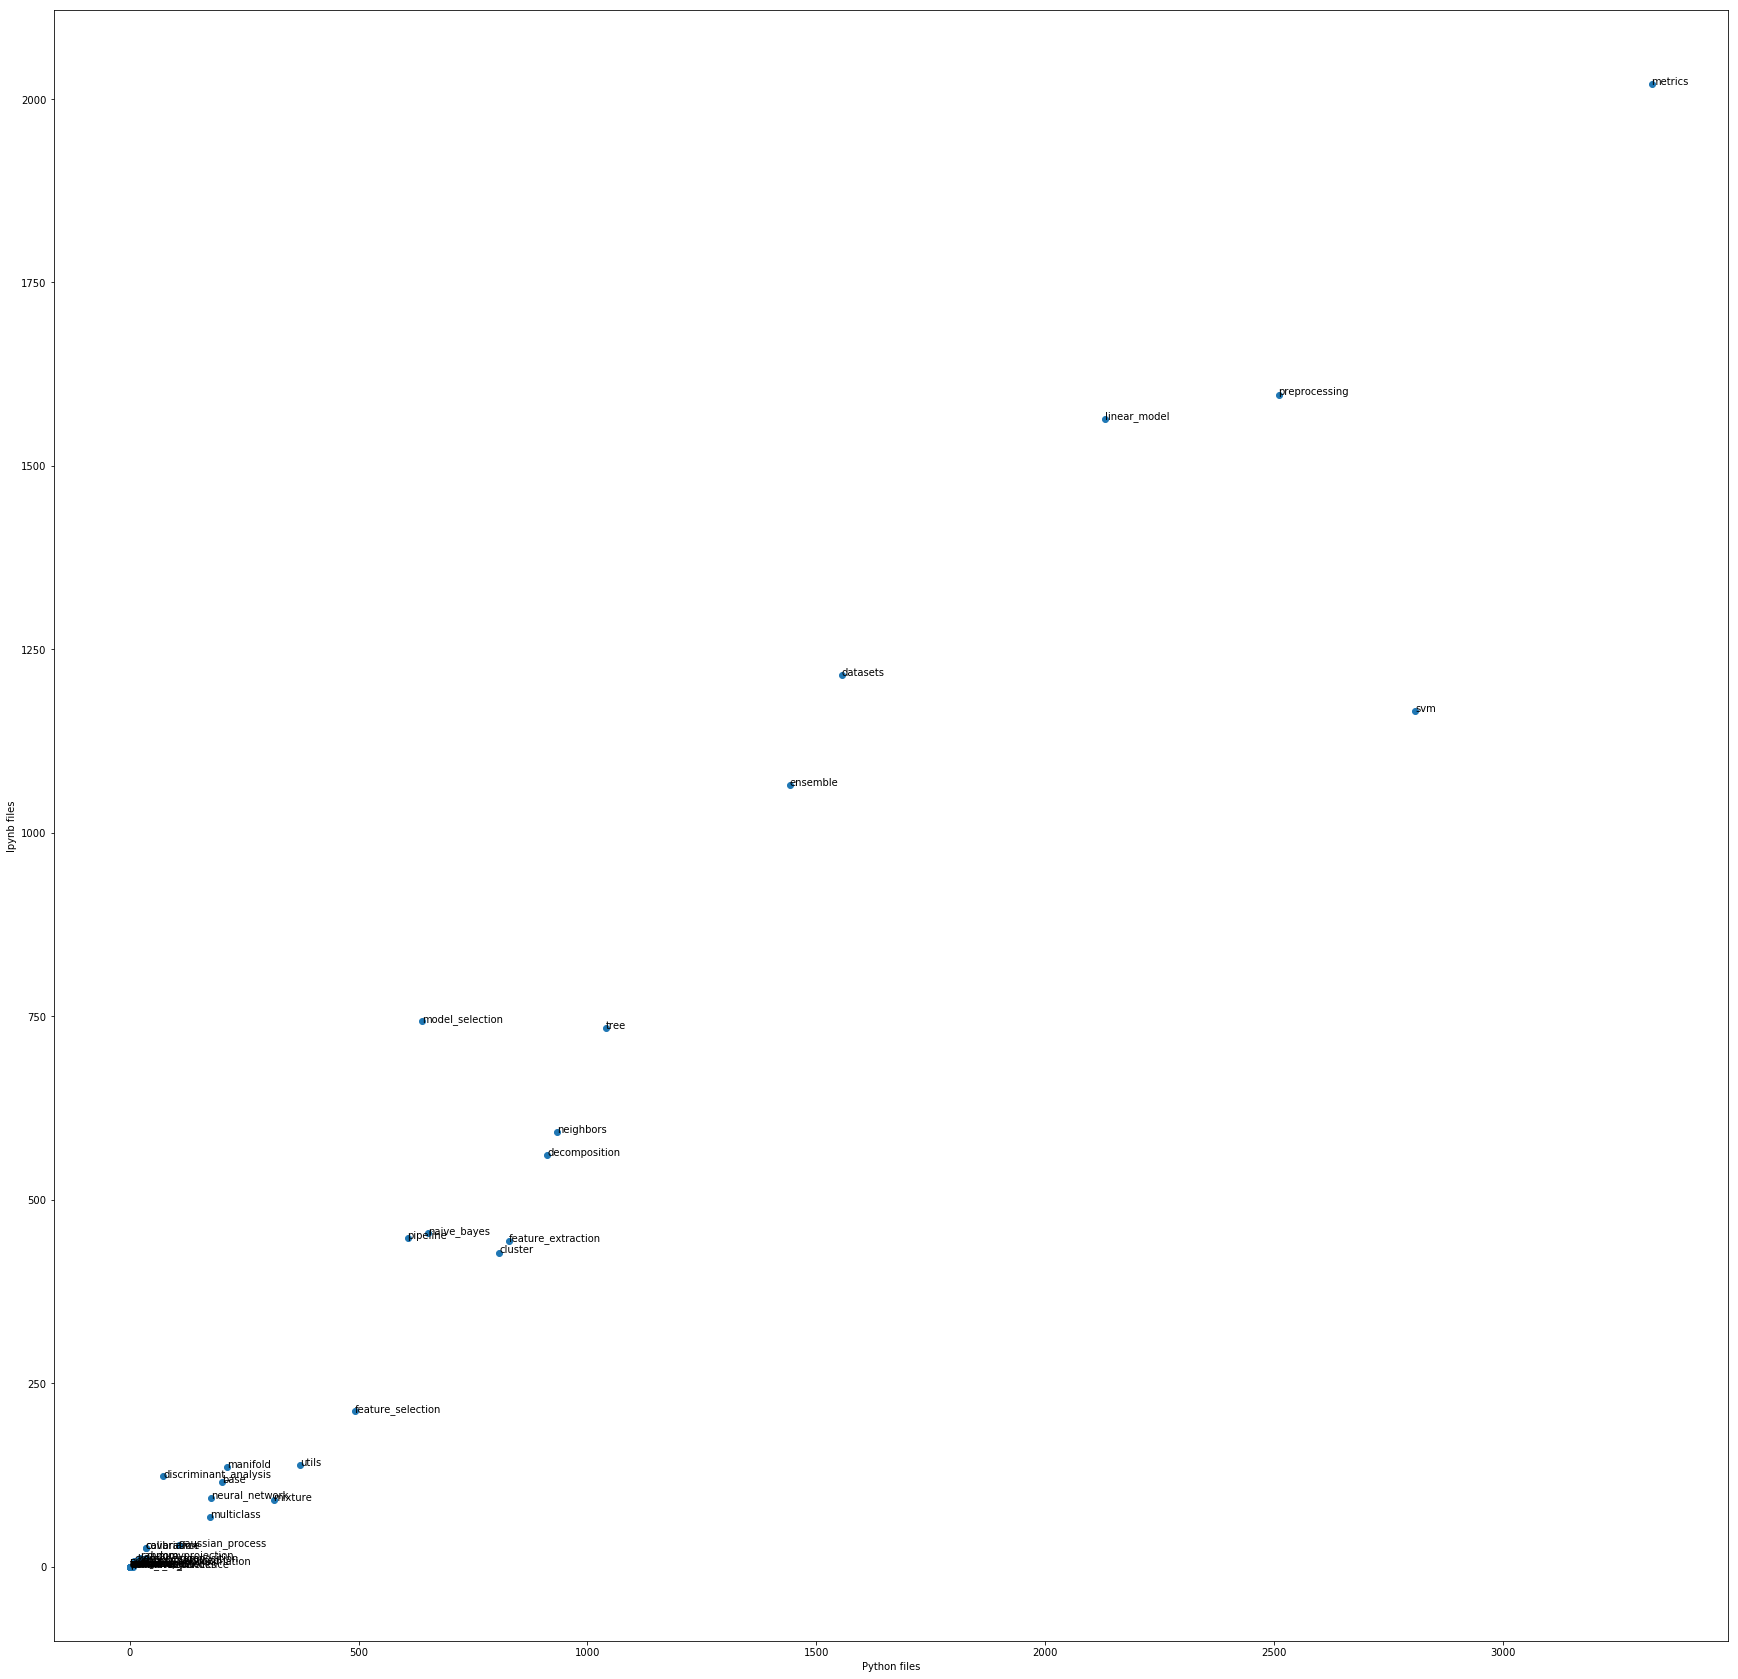

In [24]:
import matplotlib.pyplot as plt
y= sub_module_count_ipynb_df['count']
x= sub_module_count_py_unique_df['count']

fig, ax = plt.subplots(figsize=(30,30))
ax.scatter(x, y)
ax.set_xlabel("Python files")
ax.set_ylabel("Ipynb files")

for i, txt in enumerate(sub_module_count_ipynb_df['sub_module']):
    ax.annotate(txt, (x[i],y[i]))

### Scikit-learn class, function and submodule analysis using BigQuery API

In [ ]:
SklearnClassAnalysis_New= []

for className in classNames[:191]:

    repoThatImportsSklearnClassesQuery = """\
    SELECT repo_name, COUNT(*) count
    FROM (
          SELECT line, repo_name
          FROM(
          SELECT  SPLIT(content, '\\n') as lines, repo_name
          FROM
          `Odyssey_github_sklearn.content_py_unique`
          ), UNNEST(lines) line

          WHERE ((REGEXP_CONTAINS(line, 'from sklearn.+ import %s')) OR
          (REGEXP_CONTAINS(line, 'import sklearn.+.%s'))) AND %s
         )

         GROUP BY 1
    ORDER BY count DESC
    LIMIT 10

    """ %(className,className,excludeByRepoFull(excludedRepos))
    repoThatImportsSklearnClasses = gp.run(repoThatImportsSklearnClassesQuery)
    SklearnClassAnalysis_New.append(repoThatImportsSklearnClasses)
    

In [83]:
SklearnClassAnalysis_New = pd.DataFrame(SklearnClassAnalysis_New)
SklearnClassAnalysis_New.to_csv("sklearn_class_usage.csv")

In [99]:
SklearnFunctionAnalysis=[]

for function_name in function_names:

    repoThatImportsSklearnFunctionQuery = """\
    SELECT repo_name, COUNT(*) count
    FROM (
          SELECT line, repo_name
          FROM(
          SELECT  SPLIT(content, '\\n') as lines, repo_name
          FROM
          `Odyssey_github_sklearn.content_py_unique`
          ), UNNEST(lines) line

          WHERE ((REGEXP_CONTAINS(line, 'from sklearn.+ import %s')) OR
          (REGEXP_CONTAINS(line, 'import sklearn.+.%s'))) AND %s
         )

         GROUP BY 1
    ORDER BY count DESC
    LIMIT 10

    """ %(function_name,function_name,excludeByRepoFull(excludedRepos))
    repoThatImportsSklearnFunction = gp.run(repoThatImportsSklearnFunctionQuery)
    SklearnFunctionAnalysis.append(repoThatImportsSklearnFunction)

In [106]:
SklearnFunctionAnalysis = pd.DataFrame(SklearnFunctionAnalysis)
SklearnFunctionAnalysis.to_csv("sklearn_function_usage.csv")

In [102]:
SklearnSubmoduleAnalysis=[]

for submodule_name in submodule_names:

    repoThatImportsSklearnSubmoduleQuery = """\
    SELECT repo_name, COUNT(*) count
    FROM (
          SELECT line, repo_name
          FROM(
          SELECT  SPLIT(content, '\\n') as lines, repo_name
          FROM
          `Odyssey_github_sklearn.content_py_unique`
          ), UNNEST(lines) line

          WHERE ((REGEXP_CONTAINS(line, 'from sklearn.+ import %s')) OR
          (REGEXP_CONTAINS(line, 'import sklearn.+.%s'))) AND %s
         )

         GROUP BY 1
    ORDER BY count DESC
    LIMIT 10

    """ %(submodule_name,submodule_name,excleByRepoFull(excludedRepos))
      repoThatImportsSklearnSubmodule = gp.run(repoThatImportsSklearnSubmoduleQuery)
    SklearnSubmoduleAnalysis.append(repoThatmportsSklearnSubmodule)